# Bootstraping - Grupo 1
## **Group 1**: Pamela Cubas, Valeria Hoyos, Josue Magiña, Alvaro Yllu 
### Inicializando el codigo con instalación y call de modulos. 

In [54]:
using Pkg
Pkg.add("RData")
Pkg.add("LinearAlgebra")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("DataStructures")
Pkg.add("NamedArrays")
Pkg.add("PrettyTables")
Pkg.add("StatsModels")
Pkg.add("Combinatorics")
Pkg.add("CSV")
Pkg.add("Plots")
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, 
DataStructures, NamedArrays, PrettyTables, StatsModels, Combinatorics, CSV, DelimitedFiles, Plots

   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.

### 1. Cargando la base de datos y generando una tabla de resumen

In [61]:
mat, head = readdlm("../../data/penn_jae.dat", header=true, Float64)
df =DataFrame(mat, vec(head))
describe(df[:, [:tg, :female, :black]])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,tg,2.56889,0.0,2.0,6.0,0,Float64
2,female,0.402142,0.0,0.0,1.0,0,Float64
3,black,0.116653,0.0,0.0,1.0,0,Float64


### 2. Filtrando el dataframe para todos los valores donde tg != [4,0] y Obteniendo coeficientes filtrados

In [75]:
filtered_df = filter(row -> row.tg in [4,0],df)
flex = @formula(log(inuidur1)~tg+ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
control_model = lm(flex , filtered_df)
control_se = GLM.coeftable(control_model).cols[1][2]
println(control_model)
println(control_se)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

:(log(inuidur1)) ~ 1 + tg + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   2.17844      0.159001   13.70    <1e-41   1.86673      2.49015
tg           -0.0179147    0.008865   -2.02    0.0433  -0.0352939   -0.00053551
female        0.12581      0.0347802   3.62    0.0003   0.0576263    0.193995
black        -0.293971     0.0529673  -5.55    <1e-07  -0.397809    -0.190132
othrace      -0.470387     0.198281   -2.37    0.0177  -0.859103    -0.0816719
dep           0.0459935    0.0225355   2.04   

### 3. Inicializando Boostrapping.
3.1 Inicializamos vectores donde se puedan guardar los valores de la desviación estandard de cada fold durante el boostrapping. Esta sera nuestra distribución. Esto se hara para los parametros tg, female y black. 


3.2 Utilizaremos el commando "shuffle" para generar una muestra aleatoria del dataframe y solamente consideramos los primeros "n" valores del dataframe. Estos nos generara nuestro fold. 


3.3 Obtenemos los coefi

In [86]:
tg_estimate = []
fem_estimate = []
black_estimate = []

for i in 1:1000
    sampled_df = filtered_df[shuffle(1:nrow(filtered_df))[1:10], :]
    flex = @formula(log(inuidur1)~tg+ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
    control_model = lm(flex , sampled_df)
    append!(tg_estimate,GLM.coeftable(control_model).cols[1][2])
    append!(fem_estimate,GLM.coeftable(control_model).cols[1][3])
    append!(black_estimate,GLM.coeftable(control_model).cols[1][4])
    

end

std_tg = std(st_tg)
std_fem = std(st_fem)
std_black = std(st_black)

0.010693956858063097

### 4. Detallando hallazgos.

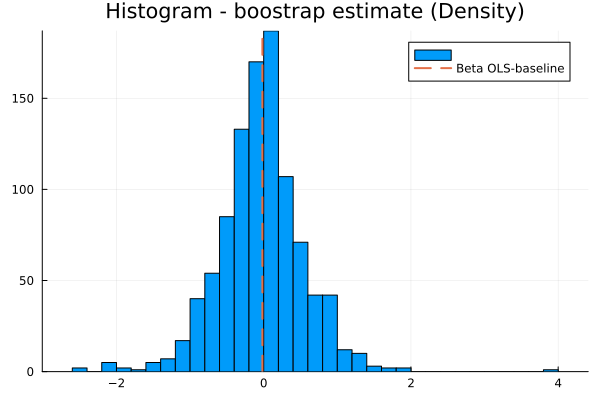

In [87]:
histogram(tg_estimate, label = " ")
plot!( xlim=xlims(), label = " ", title = "Histogram - boostrap estimate (Density)")
vline!( [-0.0179147], linestyle = :dash , label = "Beta OLS-baseline", lw=2)